## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**Author: SUNDARA RAMA AKHIL, DATA SCIENCE & BUSINESS ANALYTICS INTERN**

Copyright Xaltius Pte. Ltd., 2018




**TASK-1 Prediction using Supervised ML**


In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [2]:
# Reading data 

df_data = pd.read_csv('http://bit.ly/w-data')

print("Data imported successfully")

df_data.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

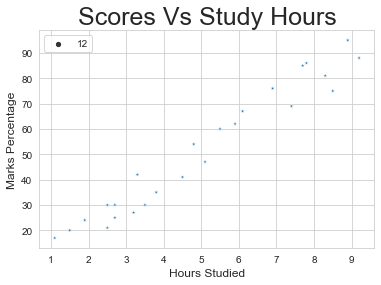

In [3]:
# Plotting the distribution of scores
sns.set_style('whitegrid')
sns.scatterplot(y= df_data['Scores'], x= df_data['Hours'],marker = '*', size=12,s = 100,alpha = 1.0)
plt.title('Scores Vs Study Hours',size=25)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

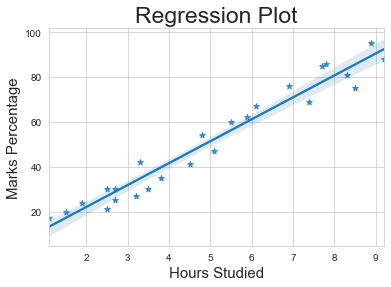

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [4]:
sns.regplot(x= df_data['Hours'], y= df_data['Scores'],marker = '*')
plt.title('Regression Plot',size=23,)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()
print(df_data.corr())

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = df_data.iloc[:, :-1].values  
y = df_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [6]:
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(train_x, train_y)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

print("Training complete.")

2.018160041434683
[9.91065648]
Training complete.


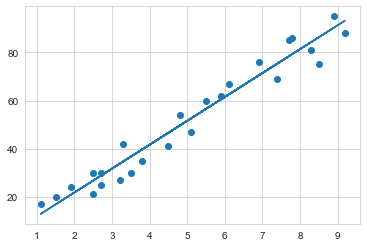

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [9]:
print(test_x) # Testing data - In Hours
y_pred = regressor.predict(test_x) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual Markes': test_y.flatten(), 'Predicted Markes': y_pred.flatten()})
df.head(10)

,Actual Markes,Predicted Markes
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


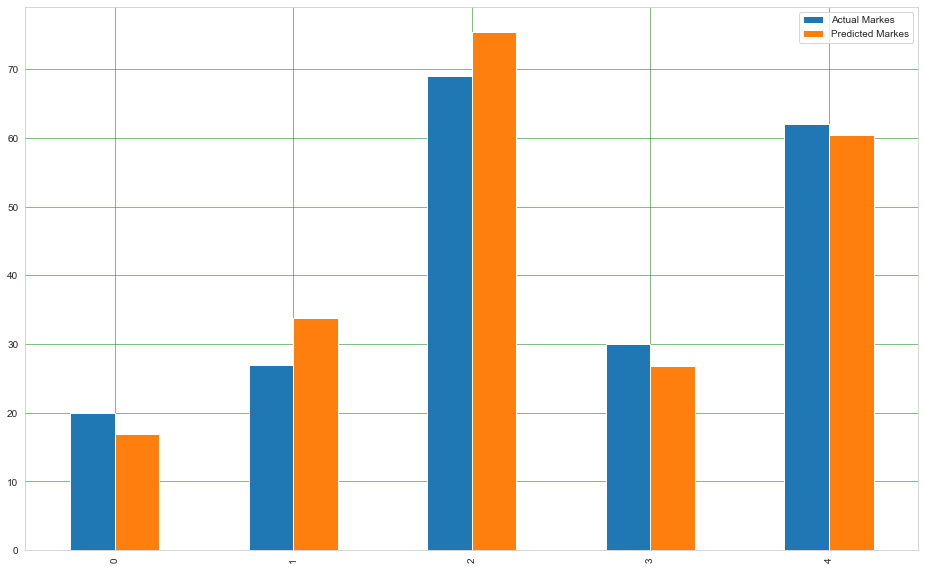

In [11]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [13]:
prediction = pd.DataFrame({'Hours': [i[0] for i in test_x], 'Predicted Marks': [k for k in y_pred]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [14]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


**So finally we come to conclusion that, according to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**

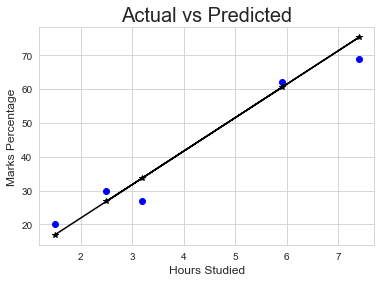

In [44]:
plt.scatter(x=test_x, y=test_y, color='blue')
plt.plot(test_x, pred_y, color='Black',marker = '*')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean absolute error. There are many such metrics.

In [46]:
from sklearn import metrics  
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))

Mean absolute error:  4.183859899002975


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less**